<a href="https://colab.research.google.com/github/Mh-Osman/Machine_Learning/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
import numpy as np
from tensorflow import keras
import pandas as pd



In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

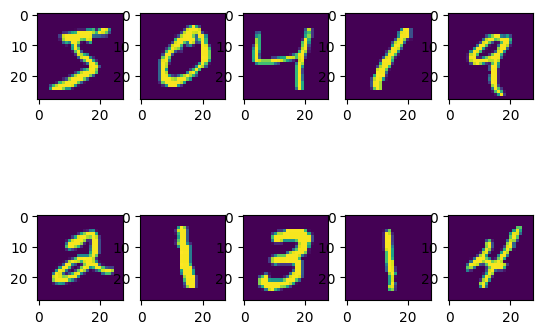

In [14]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

In [15]:
from re import X
X_tran=X_train/255
X_test=X_test/255

In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X_tran,y_train,epochs=10 , validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9675 - loss: 0.1065 - val_accuracy: 0.9670 - val_loss: 0.1104
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9775 - loss: 0.0756 - val_accuracy: 0.9673 - val_loss: 0.1028
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9842 - loss: 0.0531 - val_accuracy: 0.9703 - val_loss: 0.0960
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9758 - val_loss: 0.0817
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9914 - loss: 0.0300 - val_accuracy: 0.9727 - val_loss: 0.0891
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9926 - loss: 0.0260 - val_accuracy: 0.9757 - val_loss: 0.0853
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0213 - val_accuracy: 0.9765 - val_loss: 0.0909
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9957 - loss: 0.0153 -

In [31]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9759

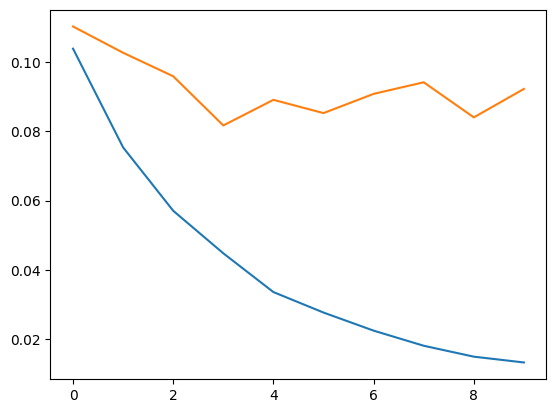

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
